In [ ]:
!git clone https://github.com/niyaryca/Idiomacity-Detection.git

fatal: destination path 'Idiomacity-Detection' already exists and is not an empty directory.


In [ ]:
import pandas as pd
from sklearn.metrics import *
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.naive_bayes import MultinomialNB,CategoricalNB 
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import imblearn.under_sampling as under
from sklearn.utils import resample

# **Zero-Shot Ensemble**

In [ ]:
xlm_zeroshot_results= pd.read_csv("Idiomacity-Detection/Model_Results/Results_XLMRLarge.csv")
xlnet_zeroshot_results = pd.read_csv("Idiomacity-Detection/Model_Results/Zeroshot_results_XLNET.csv")
distilbert_zeroshot_results = pd.read_csv("Idiomacity-Detection/Model_Results/Zeroshot_results_DistilBERT.csv")
mbert_zeroshot_results = pd.read_csv("Idiomacity-Detection/Model_Results/Zeroshot_results_mBERT.csv")

In [ ]:
dev_gold = pd.read_csv("Idiomacity-Detection/Rawdata/dev_gold.csv")
dev_gold_zero_list_EN = dev_gold[dev_gold['Language']=='EN']
dev_gold_zero_list_PT = dev_gold[dev_gold['Language']=='PT']

In [ ]:
xlm_zeroshot_results = xlm_zeroshot_results.drop(xlm_zeroshot_results[xlm_zeroshot_results.Setting=='one_shot'].index)
xlnet_zeroshot_results = xlnet_zeroshot_results.drop(xlnet_zeroshot_results[xlnet_zeroshot_results.Setting=='one_shot'].index)
distilbert_zeroshot_results = distilbert_zeroshot_results.drop(distilbert_zeroshot_results[distilbert_zeroshot_results.Setting=='one_shot'].index)

## **English-Portuguse**

In [ ]:
english_port = dev_gold.copy()
english_port = english_port.drop(['DataID'], axis=1)
english_port['XLM'] = xlm_zeroshot_results['Label'].astype(int)
english_port['XLNET'] = xlnet_zeroshot_results['Label'].astype(int)
english_port['DISTIL'] = distilbert_zeroshot_results['Label'].astype(int)
english_port['Label'].value_counts()

1    403
0    336
Name: Label, dtype: int64

In [ ]:
df_one = english_port[(english_port['Label']==1)]
df_zero = english_port[(english_port['Label']==0)]
df_one_undersampled = resample(df_one,
                              replace=True,
                              n_samples= len(df_zero),
                              random_state=42)

df_undersampled = pd.concat([df_one_undersampled, df_zero])
df_undersampled['Label'].value_counts()

1    336
0    336
Name: Label, dtype: int64

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.asarray(df_undersampled[['XLM', 'XLNET', 'DISTIL']])
Y = np.asarray(df_undersampled['Label'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,shuffle=True)

In [ ]:
# ensemble_list_zero = []
# length = len(xlnet_zero_list)
# func_sum = lambda average_sum : 1 if(average_sum>1) else 0
# for i in range(length):
#   average_sum = xlnet_zero_list[i] + distilbert_zero_list[i] + xlmrob_zero_list[i] 
#   ensemble_list_zero.append(func_sum(average_sum))

In [ ]:
# params = {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
# grid_search_cv = GridSearchCV(RandomForestClassifier(random_state=42), params, verbose=1, cv=3)

# grid_search_cv.fit(X_train, y_train)
# grid_search_cv.best_params_

Random Forest


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


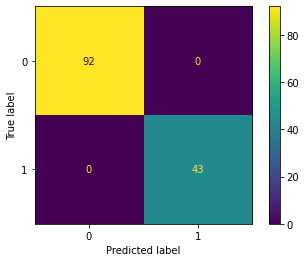

In [ ]:
rf_EN_PT_zeroshot = RandomForestClassifier(max_depth=2, random_state=0)
print('Random Forest')
rf_EN_PT_zeroshot.fit(X_train, y_train)
y_pred_rf = rf_EN_PT_zeroshot.predict(X_test)
plot_confusion_matrix(rf_EN_PT_zeroshot,X_test,y_pred_rf)

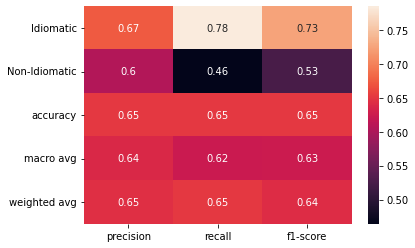

In [ ]:
clf_report = classification_report(y_test, y_pred_rf , target_names = ['Idiomatic','Non-Idiomatic'],output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [ ]:
zero_EN_PT_acc = accuracy_score(y_test, y_pred_rf)
zero_EN_PT_f1 = f1_score(y_test, y_pred_rf, average='macro')

## **English**

In [ ]:
xlnet_zero_list_EN = xlnet_zeroshot_results[xlnet_zeroshot_results['Language']=='EN']
distilbert_zero_list_EN = distilbert_zeroshot_results[distilbert_zeroshot_results['Language']=='EN']
xlmrob_zero_list_EN = xlm_zeroshot_results[xlm_zeroshot_results['Language']=='EN']

In [ ]:
english_zero = dev_gold_zero_list_EN.copy()
english_zero = english_zero.drop(['DataID'], axis=1)
english_zero['XLM'] = xlmrob_zero_list_EN['Label'].astype(int)
english_zero['XLNET'] = xlmrob_zero_list_EN['Label'].astype(int)
english_zero['DISTIL'] = distilbert_zero_list_EN['Label'].astype(int)
english_zero['Label'].value_counts()

1    284
0    182
Name: Label, dtype: int64

In [ ]:
df_one = english_zero[(english_zero['Label']==1)]
df_zero = english_zero[(english_zero['Label']==0)]
df_one_undersampled = resample(df_one,
                              replace=True,
                              n_samples= len(df_zero),
                              random_state=42)

df_undersampled = pd.concat([df_one_undersampled, df_zero])
df_undersampled['Label'].value_counts()

1    182
0    182
Name: Label, dtype: int64

Random Forest


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


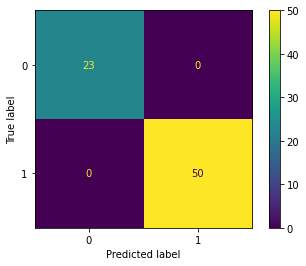

In [ ]:
X = np.asarray(df_undersampled[['XLM', 'XLNET', 'DISTIL']])
Y = np.asarray(df_undersampled['Label'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,shuffle=True)

rf_EN_zeroshot = RandomForestClassifier(max_depth=2, random_state=0)
print('Random Forest')
rf_EN_zeroshot.fit(X_train, y_train)
y_pred_rf_EN = rf_EN_zeroshot.predict(X_test)
plot_confusion_matrix(rf_EN_zeroshot,X_test,y_pred_rf_EN)

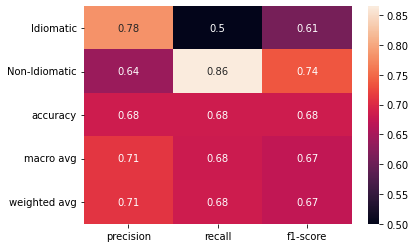

In [ ]:
clf_report = classification_report(y_test, y_pred_rf_EN , target_names = ['Idiomatic','Non-Idiomatic'],output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [ ]:
zero_EN_acc = accuracy_score(y_test, y_pred_rf_EN)
zero_EN_f1 = f1_score(y_test, y_pred_rf_EN, average='macro')

## **Portuguese**

In [ ]:
xlnet_zero_list_PT = xlnet_zeroshot_results[xlnet_zeroshot_results['Language']=='PT']
distilbert_zero_list_PT = distilbert_zeroshot_results[distilbert_zeroshot_results['Language']=='PT']
xlmrob_zero_list_PT = xlm_zeroshot_results[xlm_zeroshot_results['Language']=='PT']

In [ ]:
portuguese_zero = dev_gold_zero_list_PT.copy()
portuguese_zero = portuguese_zero.drop(['DataID'], axis=1)
portuguese_zero['XLM'] = xlmrob_zero_list_PT['Label'].astype(int)
portuguese_zero['XLNET'] = xlnet_zero_list_PT['Label'].astype(int)
portuguese_zero['DISTIL'] = distilbert_zero_list_PT['Label'].astype(int)
portuguese_zero['Label'].value_counts()

0    154
1    119
Name: Label, dtype: int64

In [ ]:
df_one = portuguese_zero[(portuguese_zero['Label']==1)]
df_zero = portuguese_zero[(portuguese_zero['Label']==0)]
df_one_undersampled = resample(df_zero,
                              replace=True,
                              n_samples= len(df_one),
                              random_state=42)

df_undersampled = pd.concat([df_one_undersampled, df_one])
df_undersampled['Label'].value_counts()

0    119
1    119
Name: Label, dtype: int64

Random Forest


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


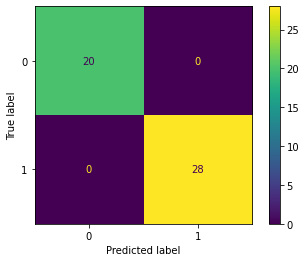

In [ ]:
X = np.asarray(df_undersampled[['XLM', 'XLNET', 'DISTIL']])
Y = np.asarray(df_undersampled['Label'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,shuffle=True)

rf_PT_zeroshot = RandomForestClassifier(max_depth=2, random_state=0)
print('Random Forest')
rf_PT_zeroshot.fit(X_train, y_train)
y_pred_rf_PT = rf_PT_zeroshot.predict(X_test)
plot_confusion_matrix(rf_PT_zeroshot,X_test,y_pred_rf_PT)

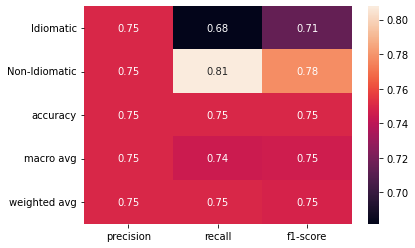

In [ ]:
clf_report = classification_report(y_test, y_pred_rf_PT , target_names = ['Idiomatic','Non-Idiomatic'],output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [ ]:
zero_PT_acc = accuracy_score(y_test, y_pred_rf_PT)
zero_PT_f1 = f1_score(y_test, y_pred_rf_PT, average='macro')

# **One-Shot Ensemble**

In [ ]:
xlm_oneshot_results= pd.read_csv("Idiomacity-Detection/Model_Results/Results_XLMRLarge.csv")
xlnet_oneshot_results = pd.read_csv("Idiomacity-Detection/Model_Results/Oneshot_results_XLNET.csv")
distilbert_oneshot_results = pd.read_csv("Idiomacity-Detection/Model_Results/Oneshot_results_DistilBERT.csv")
xlm_oneshot_results

,ID,Language,Setting,Label
0,3652,EN,zero_shot,1
1,11103,EN,zero_shot,0
2,84346,EN,zero_shot,1
3,56279,EN,zero_shot,0
4,17886,EN,zero_shot,1
...,...,...,...,...
1473,95336,PT,one_shot,1
1474,20353,PT,one_shot,1
1475,54479,PT,one_shot,1
1476,85941,PT,one_shot,1


In [ ]:
xlm_oneshot_results = xlm_oneshot_results.drop(xlm_oneshot_results[xlm_oneshot_results.Setting=='zero_shot'].index).reset_index()
xlnet_oneshot_results = xlnet_oneshot_results.drop(xlnet_oneshot_results[xlnet_oneshot_results.Setting=='zero_shot'].index).reset_index()
distilbert_oneshot_results = distilbert_oneshot_results.drop(distilbert_oneshot_results[distilbert_oneshot_results.Setting=='zero_shot'].index).reset_index()

In [ ]:
dev_gold = pd.read_csv("Idiomacity-Detection/Rawdata/dev_gold.csv")
dev_gold_one_list_EN = dev_gold[dev_gold['Language']=='EN']
dev_gold_one_list_PT = dev_gold[dev_gold['Language']=='PT']
dev_gold

,ID,DataID,Language,Label
0,3652,dev.EN.147.1,EN,1
1,11103,dev.EN.147.2,EN,1
2,84346,dev.EN.147.3,EN,1
3,56279,dev.EN.147.4,EN,1
4,17886,dev.EN.147.5,EN,1
...,...,...,...,...
734,95336,dev.PT.394.4,PT,1
735,20353,dev.PT.394.5,PT,1
736,54479,dev.PT.394.6,PT,1
737,85941,dev.PT.394.7,PT,1


## **English-Portuguse**

In [ ]:
english_port_one = dev_gold.copy()
english_port_one = english_port_one.drop(['DataID'], axis=1)
english_port_one['XLM'] = xlm_oneshot_results['Label'].astype(int)
english_port_one['XLNET'] = xlnet_oneshot_results['Label'].astype(int)
english_port_one['DISTIL'] = distilbert_oneshot_results['Label'].astype(int)
english_port_one['Label'].value_counts()

1    403
0    336
Name: Label, dtype: int64

In [ ]:
df_one = english_port_one[(english_port_one['Label']==1)]
df_zero = english_port_one[(english_port_one['Label']==0)]
df_one_undersampled = resample(df_one,
                              replace=True,
                              n_samples= len(df_zero),
                              random_state=42)

df_undersampled = pd.concat([df_one_undersampled, df_zero])
df_undersampled['Label'].value_counts()

1    336
0    336
Name: Label, dtype: int64

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.asarray(df_undersampled[['XLM', 'XLNET', 'DISTIL']])
Y = np.asarray(df_undersampled['Label'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,shuffle=True)

Random Forest


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


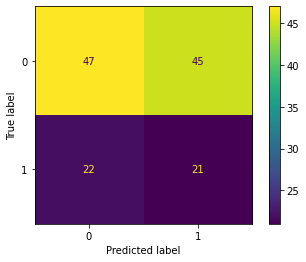

In [ ]:
rf_EN_PT_oneshot = RandomForestClassifier(max_depth=2, random_state=0)
print('Random Forest')
rf_EN_PT_oneshot.fit(X_train, y_train)
y_pred_rf_one = rf_EN_PT_oneshot.predict(X_test)
plot_confusion_matrix(rf_EN_PT_oneshot,X_test,y_pred_rf)

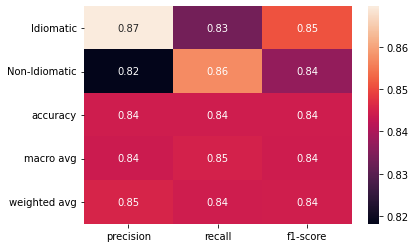

In [ ]:
clf_report = classification_report(y_test, y_pred_rf_one , target_names = ['Idiomatic','Non-Idiomatic'],output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [ ]:
one_EN_PT_acc = accuracy_score(y_test, y_pred_rf_one)
one_EN_PT_f1 = f1_score(y_test, y_pred_rf_one, average='macro')

## **English**

In [ ]:
xlnet_one_list_EN = xlnet_oneshot_results[xlnet_oneshot_results['Language']=='EN']
distilbert_one_list_EN = distilbert_oneshot_results[distilbert_zeroshot_results['Language']=='EN']
xlmrob_one_list_EN = xlm_oneshot_results[xlm_oneshot_results['Language']=='EN']

In [ ]:
english_one = dev_gold_one_list_EN.copy()
english_one = english_one.drop(['DataID'], axis=1)
english_one['XLM'] = xlmrob_one_list_EN['Label'].astype(int)
english_one['XLNET'] = xlmrob_one_list_EN['Label'].astype(int)
english_one['DISTIL'] = distilbert_one_list_EN['Label'].astype(int)
english_one['Label'].value_counts()

1    284
0    182
Name: Label, dtype: int64

In [ ]:
df_one = english_one[(english_one['Label']==1)]
df_zero = english_one[(english_one['Label']==0)]
df_one_undersampled = resample(df_one,
                              replace=True,
                              n_samples= len(df_zero),
                              random_state=42)

df_undersampled = pd.concat([df_one_undersampled, df_zero])
df_undersampled['Label'].value_counts()

1    182
0    182
Name: Label, dtype: int64

Random Forest


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


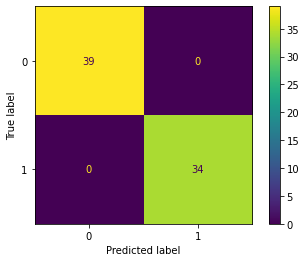

In [ ]:
X = np.asarray(df_undersampled[['XLM', 'XLNET', 'DISTIL']])
Y = np.asarray(df_undersampled['Label'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,shuffle=True)

rf_EN_oneshot = RandomForestClassifier(max_depth=2, random_state=0)
print('Random Forest')
rf_EN_oneshot.fit(X_train, y_train)
y_pred_rf_one_EN = rf_EN_oneshot.predict(X_test)
plot_confusion_matrix(rf_EN_oneshot,X_test,y_pred_rf_one_EN)

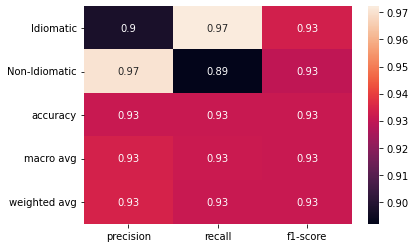

In [ ]:
clf_report = classification_report(y_test, y_pred_rf_one_EN , target_names = ['Idiomatic','Non-Idiomatic'],output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [ ]:
one_EN_acc = accuracy_score(y_test, y_pred_rf_one_EN)
one_EN_f1 = f1_score(y_test, y_pred_rf_one_EN, average='macro')

## **Portuguese**

In [ ]:
xlnet_one_list_PT = xlnet_oneshot_results[xlnet_oneshot_results['Language']=='PT']
distilbert_one_list_PT = distilbert_oneshot_results[distilbert_oneshot_results['Language']=='PT']
xlmrob_one_list_PT = xlm_oneshot_results[xlm_oneshot_results['Language']=='PT']

In [ ]:
portuguese_one = dev_gold_one_list_PT.copy()
portuguese_one = portuguese_one.drop(['DataID'], axis=1)
portuguese_one['XLM'] = xlmrob_one_list_PT['Label'].astype(int)
portuguese_one['XLNET'] = xlnet_one_list_PT['Label'].astype(int)
portuguese_one['DISTIL'] = distilbert_one_list_PT['Label'].astype(int)
portuguese_one['Label'].value_counts()

0    154
1    119
Name: Label, dtype: int64

In [ ]:
df_one = portuguese_one[(portuguese_one['Label']==1)]
df_zero = portuguese_one[(portuguese_one['Label']==0)]
df_one_undersampled = resample(df_zero,
                              replace=True,
                              n_samples= len(df_one),
                              random_state=42)

df_undersampled = pd.concat([df_one_undersampled, df_one])
df_undersampled['Label'].value_counts()

0    119
1    119
Name: Label, dtype: int64

Random Forest


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


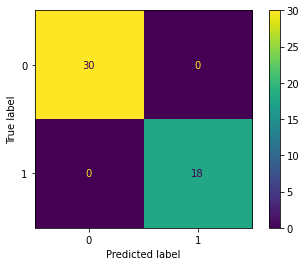

In [ ]:
X = np.asarray(df_undersampled[['XLM', 'XLNET', 'DISTIL']])
Y = np.asarray(df_undersampled['Label'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,shuffle=True)

rf_PT_oneshot = RandomForestClassifier(max_depth=2, random_state=0)
print('Random Forest')
rf_PT_oneshot.fit(X_train, y_train)
y_pred_rf_one_PT = rf_PT_oneshot.predict(X_test)
plot_confusion_matrix(rf_PT_oneshot,X_test,y_pred_rf_one_PT)

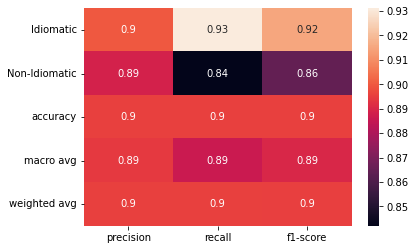

In [ ]:
clf_report = classification_report(y_test, y_pred_rf_one_PT , target_names = ['Idiomatic','Non-Idiomatic'],output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [ ]:
one_PT_acc = accuracy_score(y_test, y_pred_rf_one_PT)
one_PT_f1 = f1_score(y_test, y_pred_rf_one_PT, average='macro')

# **Ensemble Model Performance**

In [ ]:
d = {'Setting': ['zeroshot','zeroshot','zeroshot','oneshot','oneshot','oneshot'],
     'Language': ['EN', 'PT','EN-PT','EN','PT','EN-PT'],
     'Accuracy': [zero_EN_acc,zero_PT_acc,zero_EN_PT_acc,one_EN_acc,one_PT_acc,one_EN_PT_acc],
     'F1_Score(Macro)':[zero_EN_f1,zero_PT_f1,zero_EN_PT_f1,one_EN_f1,one_PT_f1,one_EN_PT_f1]}
results_ensemble = pd.DataFrame(data=d)
results_ensemble.head(6)

,Setting,Language,Accuracy,F1_Score(Macro)
0,zeroshot,EN,0.684932,0.672901
1,zeroshot,PT,0.750000,0.746032
2,zeroshot,EN-PT,0.651852,0.625199
3,oneshot,EN,0.931507,0.931455
4,oneshot,PT,0.895833,0.890060
5,oneshot,EN-PT,0.844444,0.844137
